In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import collections




In [2]:
# Importing filtered data

df = pd.read_csv('data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
df.head(10)

,unique_id,age,strata,p3,numkids,two_parent_house,regular_activity,q201,q202,q203,...,Other,Child#,has_problem,type,child_age,sex,hrs/wk in chld care,RACE,num_races,Unemployment
0,101,40.0,W high,1,1,yes,yes,2,2,2,...,NaN,1,0,NaN,1.0,male,35.0,White,1,0
1,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,1,0,NaN,6.0,male,25.0,White,1,0
2,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,2,0,NaN,7.0,female,0.0,White,1,0
3,102,29.0,MW high,1,3,yes,yes,2,2,2,...,NaN,3,0,NaN,13.0,female,0.0,White,1,0
4,103,43.0,S high,1,1,yes,yes,2,2,8,...,NaN,1,0,NaN,2.0,male,32.0,White,1,0
5,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,1,0,NaN,7.0,female,18.0,White,1,0
6,104,47.0,S high,1,2,yes,yes,3,2,1,...,NaN,2,0,NaN,9.0,male,18.0,White,1,0
7,105,55.0,W high,1,1,yes,yes,3,2,2,...,NaN,1,0,NaN,10.0,female,5.0,White,1,1
8,106,54.0,S high,1,1,yes,no,4,2,2,...,NaN,1,0,NaN,10.0,female,NaN,Mix,2,0
9,107,34.0,S high,2,3,yes,no,4,2,1,...,NaN,1,0,NaN,2.0,male,NaN,White,1,0


In [4]:
# Filtering the data for duplicaties of type per child in each family
df_type = df.drop_duplicates(['unique_id','Child#','type'])
print(df_type.shape)
# Separating the data into children with problems and the ones who does not have any problems
df_type_has_problem = df_type.loc[df_type['has_problem'] == 1]
df_type_has_no_problem = df_type.loc[df_type['has_problem'] == 0]

(4366, 242)


In [5]:
# Printing precentage of children affected by each type of development problem

label_type = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'AD',
         'ASD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

for t in label_type:
    print(t, round(100 * df_type_has_problem.loc[df_type_has_problem['type'] == t].shape[0]/(df_type_has_problem.shape[0]),2))


PT/OT 14.2
Asthma 12.44
More medical 12.11
Special needs 8.5
ADHD 7.96
IEP 7.0
Limited ability 6.74
Chronic condition 5.66
Behavior 4.99
AD 3.85
ASD 3.85
Aggressive 3.02
Attention problem 3.06
PDD 2.39
AS 2.05
Heart 1.84
IFSP 0.34


In [6]:
# Filtering data for duplicates of each child per family
df_children = df.drop_duplicates(['unique_id','Child#'])
print(df_children.shape)

## Childer who have at least one problem
print(round(100 * df_children.loc[df_children['has_problem'] == 1].shape[0]/(df_children.shape[0]),2))
print(round(100 * df_children.loc[df_children['has_problem'] == 0].shape[0]/(df_children.shape[0]),2))

(2806, 242)
29.47
70.53


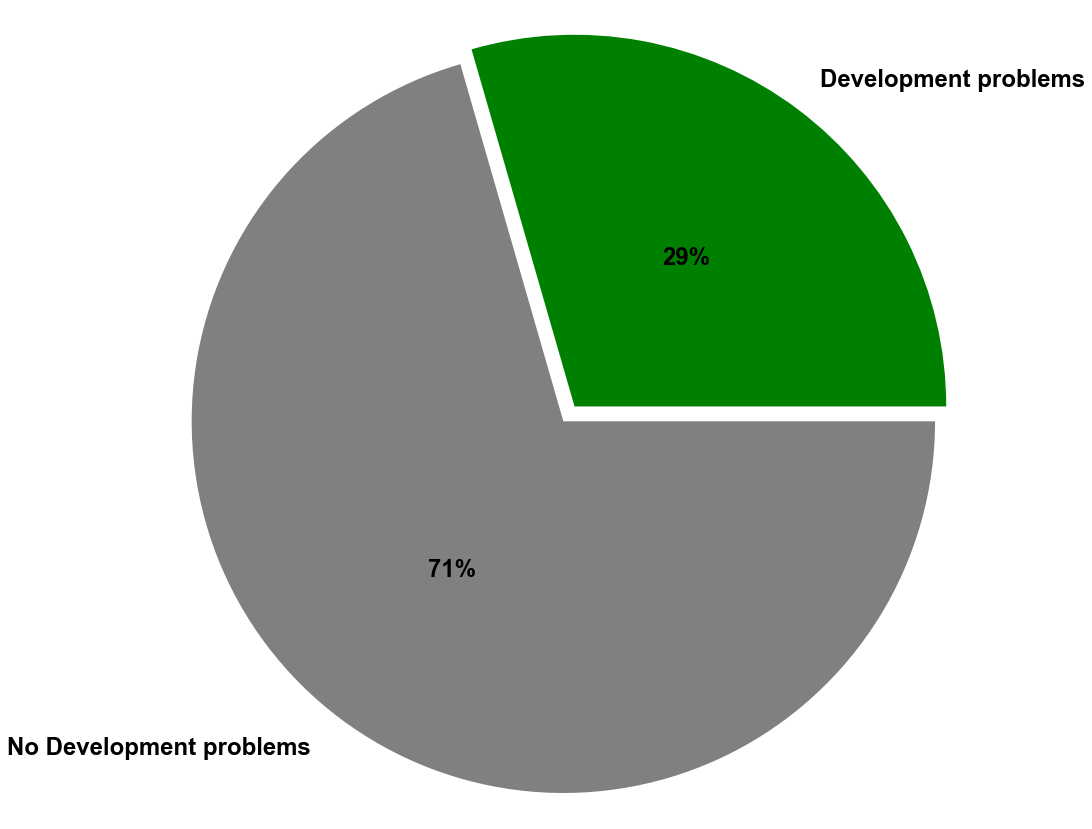

In [7]:
# Plotting pie chart for children who have development problems and the ones who don't
labels = ['Development problems', 
         'No Development problems ']



fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size'] = 24

colors = ['green', 'grey']
percentages = [29.47, 70.53]
explode=(0.05, 0)



ax.pie(percentages, explode=explode, labels=labels,  
        colors=colors,autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

plt.savefig("has_problems_pie.png")

In [8]:
## Female and male children
print(df_children.shape)
print('male', round(100 * df_children.loc[df_children['sex'] == 'male'].shape[0]/(df_children.shape[0]),2))
print('female', round(100 * df_children.loc[df_children['sex'] == 'female'].shape[0]/(df_children.shape[0]),2))

(2806, 242)
male 52.57
female 47.33


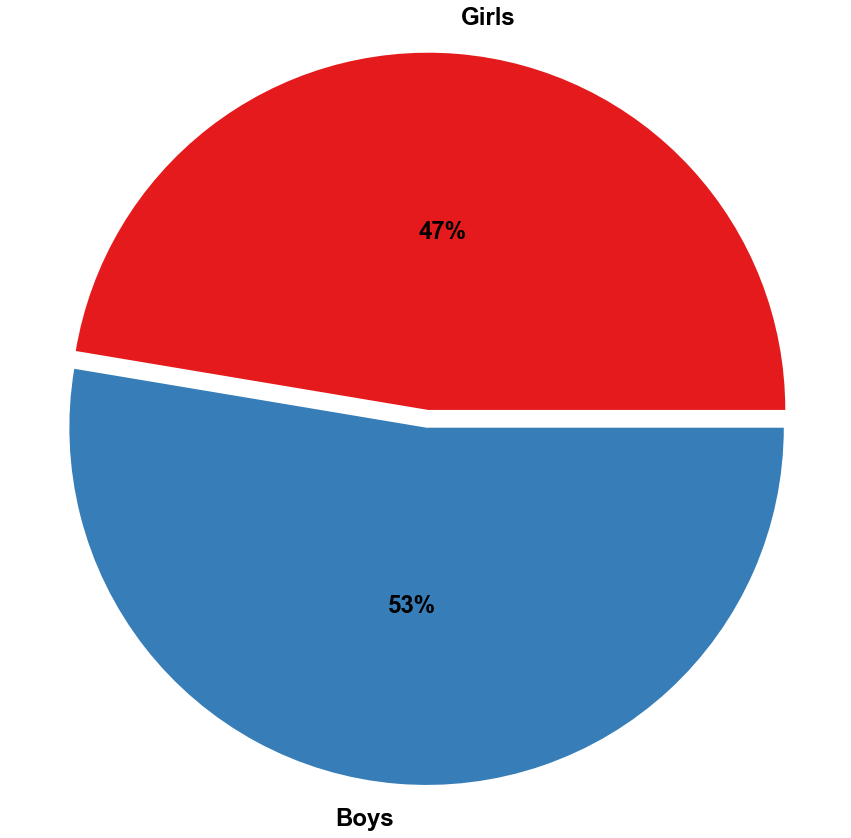

In [9]:
# Plotting pie chart for boys and girls population of the entire sample
fig, ax = plt.subplots(figsize=(15, 15))

plt.rcParams['font.size'] = 24
labels = ['Girls' ,'Boys']

percentages = [47.31, 52.58]
explode=(0.05, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

plt.savefig("male_female_pie.png")

In [10]:
df_children_has_problem = df_children.loc[df_children['has_problem'] == 1]
df_children_has_no_problem = df_children.loc[df_children['has_problem'] == 0]
print("Total number of families with kids who has at least one problem:",df_children_has_problem.shape[0])


print('male children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'male'].shape[0]/(df_children_has_problem.shape[0]),2))
print('female children has problems', round(100 * df_children_has_problem.loc[df_children_has_problem['sex'] == 'female'].shape[0]/(df_children_has_problem.shape[0]),2))


print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'male'].shape[0]/(df_children_has_no_problem.shape[0]),2))
print(round(100 * df_children_has_no_problem.loc[df_children_has_no_problem['sex'] == 'female'].shape[0]/(df_children_has_no_problem.shape[0]),2))

Total number of families with kids who has at least one problem: 827
male children has problems 61.31
female children has problems 38.69
48.91
50.93


In [11]:
## %male who have problems

29.19*61.35/100

17.908065

In [12]:
## %female who have problems

29.19*38.65/100

11.281935

In [13]:
## %male who have no problems

70.81*48.96/100

34.668576

In [14]:
## %male who have no problems

70.81*50.89/100

36.035209

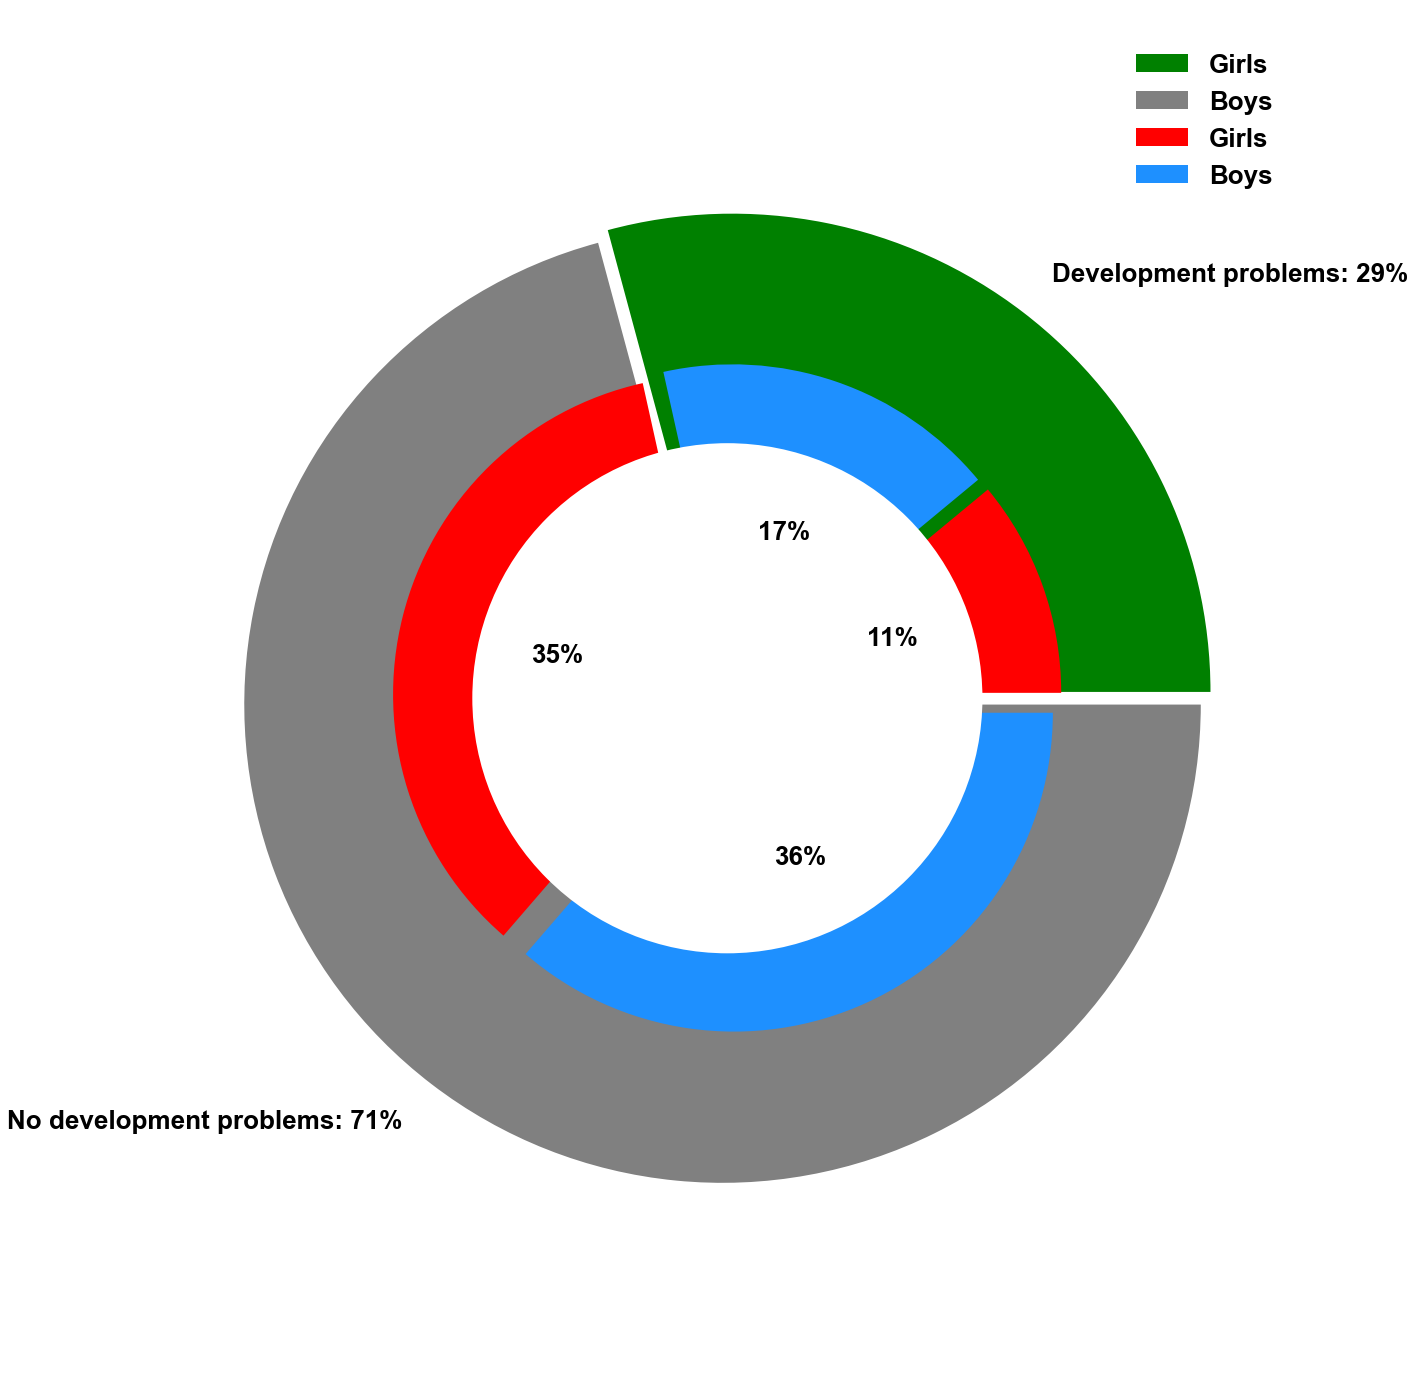

In [50]:
# Data to plot
fig, ax = plt.subplots(figsize=(20, 20))
plt.rcParams['font.size'] = 26

labels = ['Development problems: 29%', 'No development problems: 71%']
sizes = [29.19, 70.81]
labels_gender = ['17.43%' ,'36.61%', '31.13%' ,'34.67%']
sizes_gender = [11.28, 17.90, 36.04, 37.23]
colors = ['green', 'grey']
colors_gender = ['red','dodgerblue']
explode = (0.05,0.05) 
explode_gender = (0.1,0.1,0.1,0.1)
#Plot
ax.pie(sizes, labels = labels, colors=colors, startangle = 0,frame=True, explode=explode,radius=3, shadow=False,   
       pctdistance=0,labeldistance=1.1)
ax.pie(sizes_gender,  colors = colors_gender,startangle = 0, explode=explode_gender,radius=2, shadow=False,   
       autopct='%1.0f%%',pctdistance=0.5 )
#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
fig.tight_layout()
fig.legend(['Girls', 'Boys', 'Girls', 'Boys'], frameon=False, bbox_to_anchor=(0.9, 0.95)) 

plt.savefig("cool_pie.png")
plt.show()


In [16]:
# Grouping data by gender and child number to identify the number of problems for boys and girls

refined_df = df_type_has_problem[['unique_id', 'Child#','sex', 'has_problem', 'type']]
refined_df = refined_df.sort_values(by=['unique_id'])
grouped_df = refined_df.groupby(by = ['unique_id','Child#','sex']).sum().reset_index()
print(grouped_df.shape)

(827, 4)


In [17]:
# Filtering date by gender
grouped_df_male = grouped_df.loc[grouped_df['sex'] == 'male']
grouped_df_female = grouped_df.loc[grouped_df['sex'] == 'female']

In [18]:
print('List of boys who have problems', list(grouped_df_male['has_problem'].value_counts())) 
print('List of girls who have problems', list(grouped_df_female['has_problem'].value_counts())) 


List of boys who have problems [211, 101, 30, 30, 28, 28, 25, 23, 17, 7, 5, 1, 1]
List of girls who have problems [173, 43, 31, 23, 16, 14, 7, 6, 5, 1, 1]


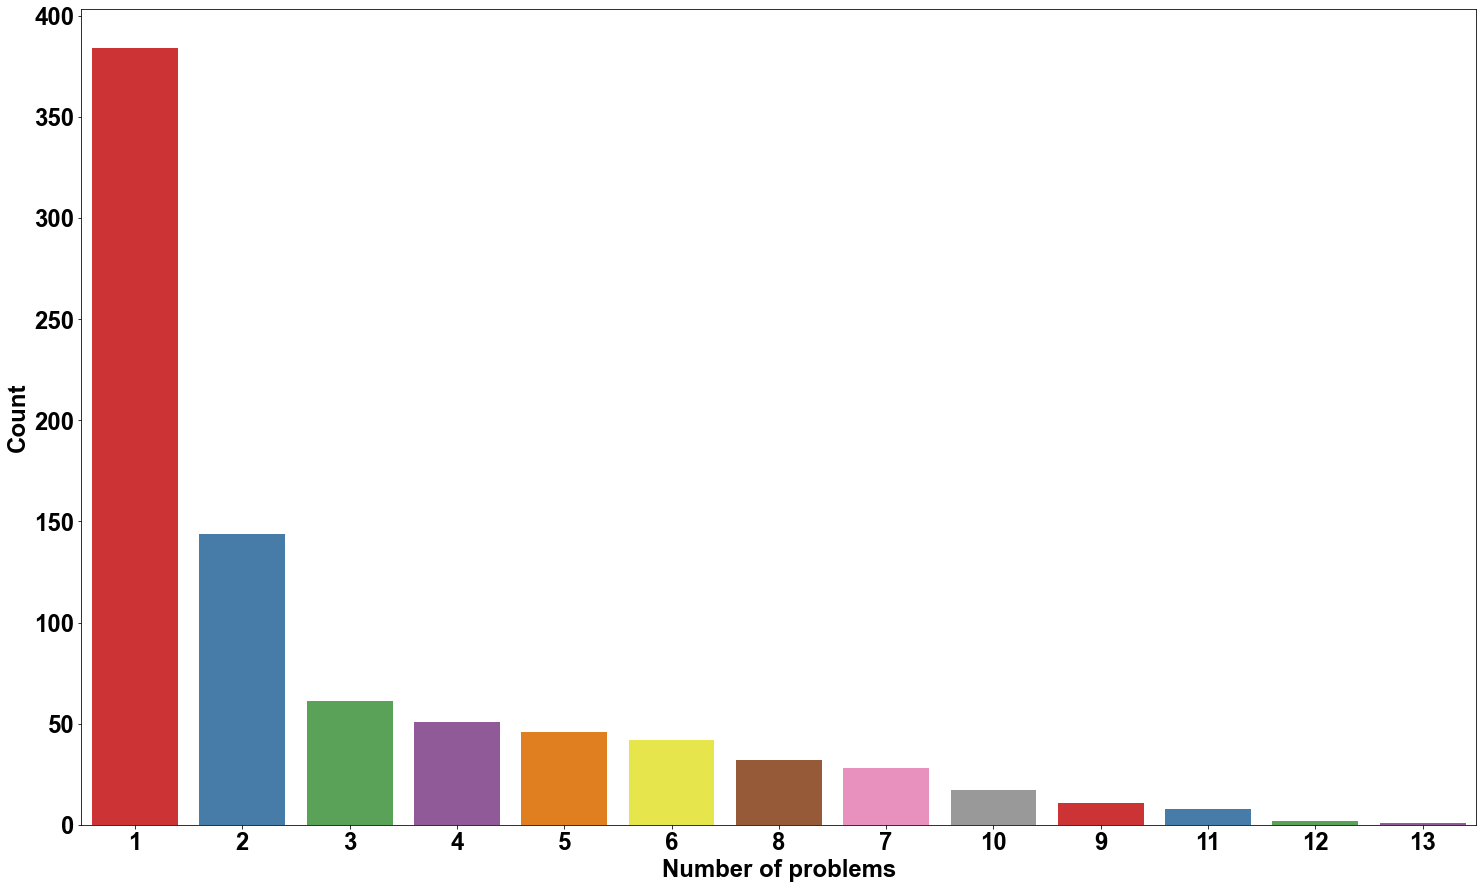

In [19]:
# Plotting grouped date to identify count per each number of childhood problems

labels = ['1', '2', '3', '4', '5', '6', '8', '7', '10', '9', '11', '12', '13'] 



plt.figure(figsize=(25, 15))

b = sb.countplot(x = "has_problem", data=grouped_df, palette="Set1", order = grouped_df['has_problem'].value_counts().index);
b.set_ylabel("Count",fontsize=24,fontweight='bold')
b.set_xlabel("Number of problems",fontsize=24, fontweight='bold')
b.set_xticklabels(labels)
b.tick_params(labelsize=24)

plt.savefig("more_than_1problem_count_has_problem.png")

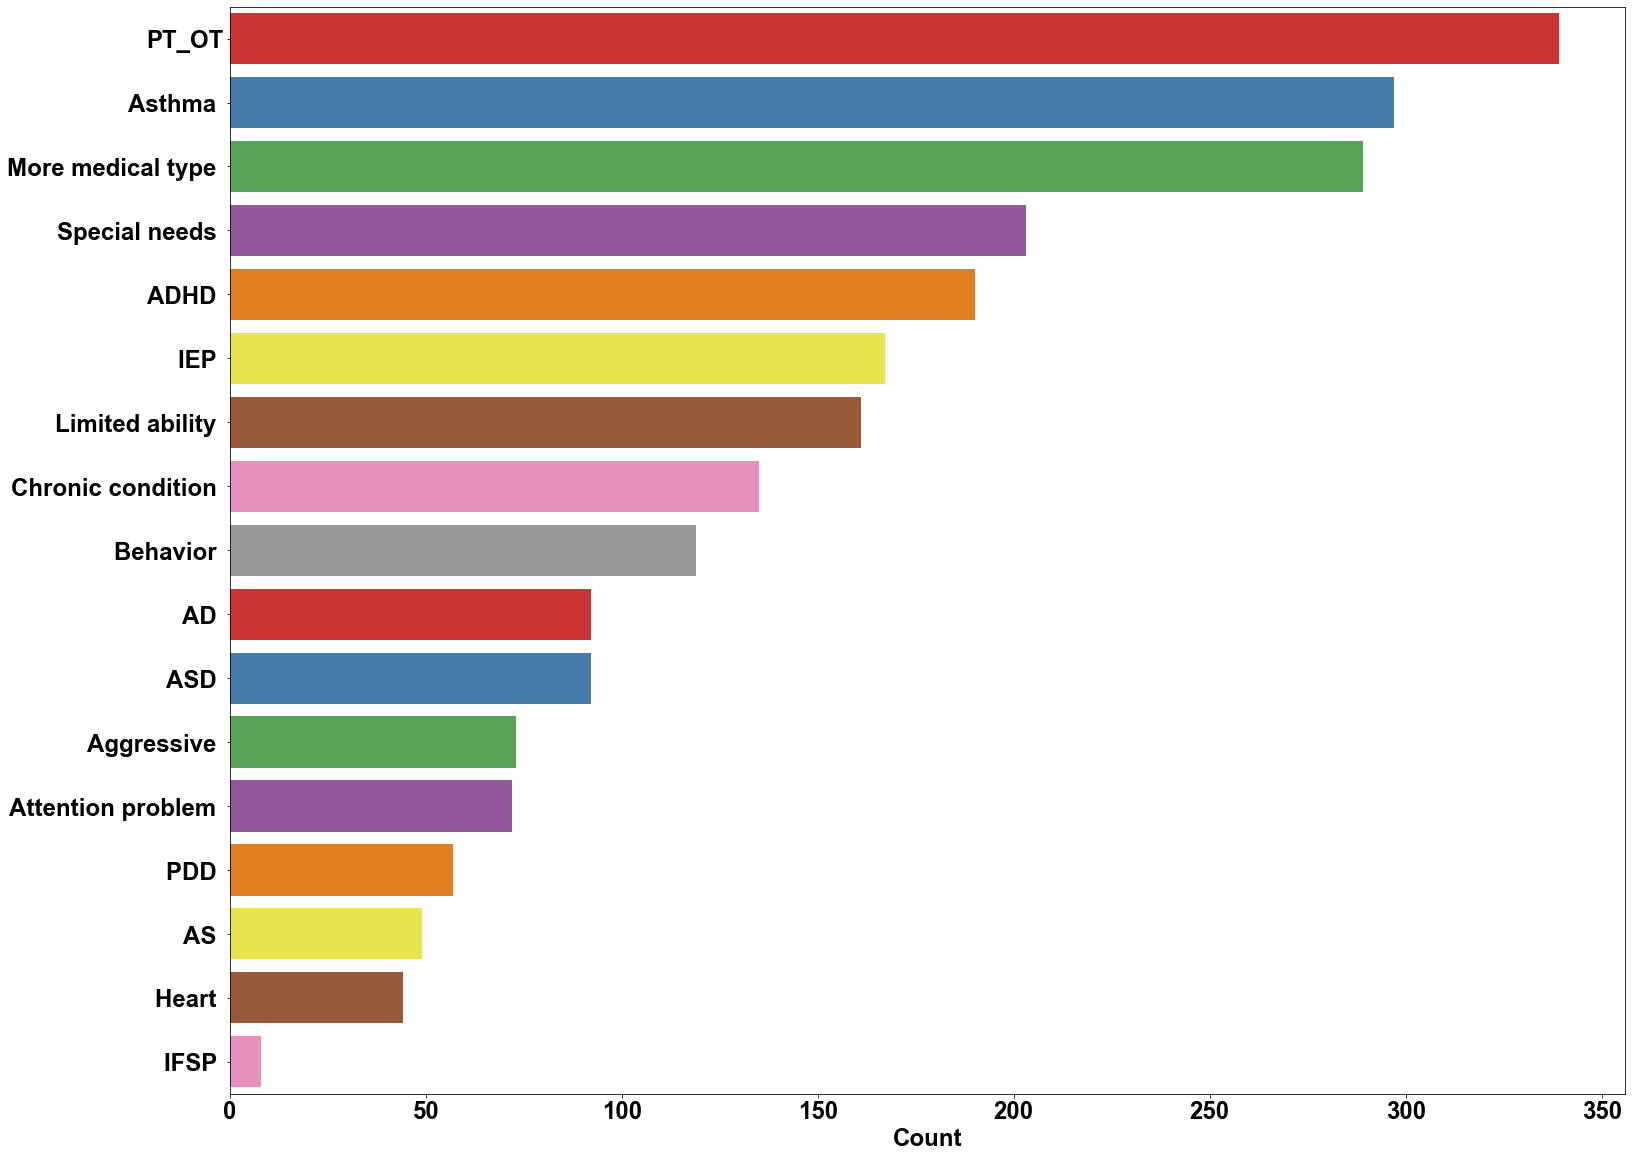

In [20]:
# Count per each problem type

labels = ['PT_OT', 
         'Asthma ',
         'More medical type ',
         'Special needs ',
         'ADHD ',          
         'IEP ',

         'Limited ability ',
         'Chronic condition ',
         'Behavior ',
         'AD ',
         'ASD ',
         'Aggressive ',          
         'Attention problem ',

         'PDD ',
         'AS ',
         'Heart ',
         'IFSP ']

plt.figure(figsize=(25, 20))

b = sb.countplot(y = "type", data=df_type_has_problem, palette="Set1", order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=24, fontweight='bold')
b.set_ylabel("",fontsize=24,fontweight='bold')
b.set_yticklabels(labels)
b.tick_params(labelsize=24)
plt.savefig("output.png")

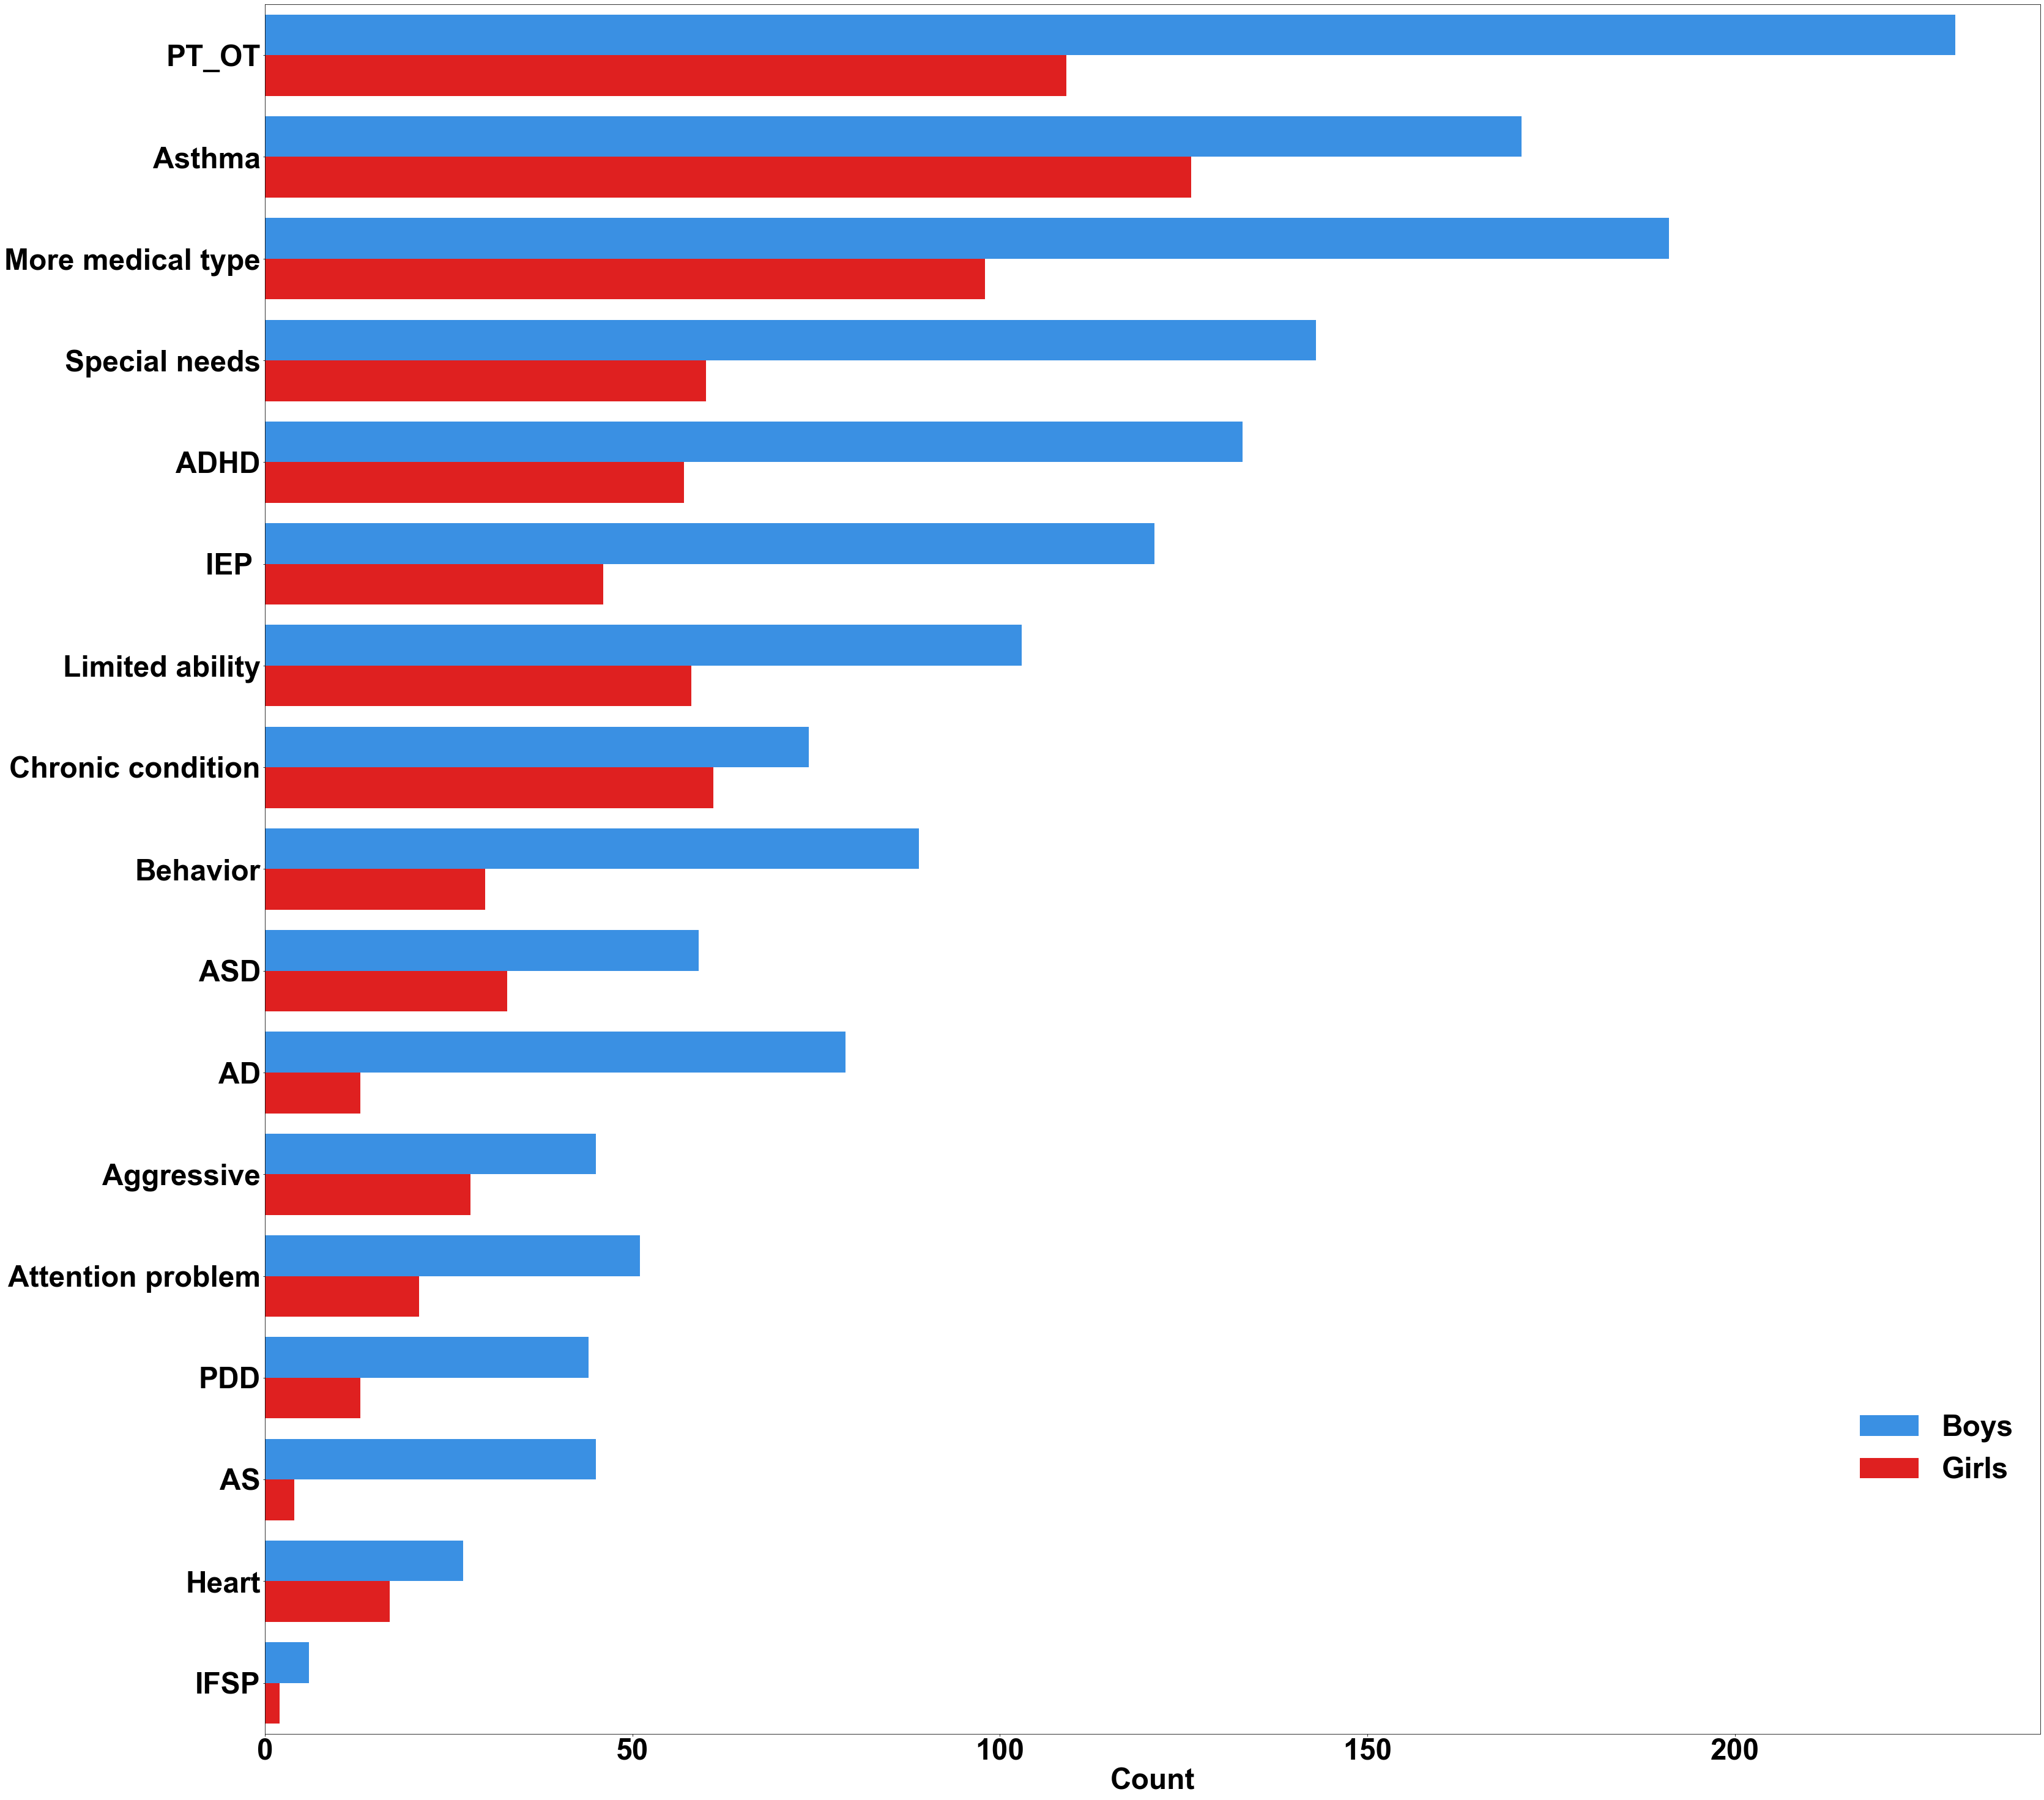

In [21]:
# Bar plot for gender per each problem type
labels = ['PT_OT', 
         'Asthma',
         'More medical type',
         'Special needs',
         'ADHD',          
         'IEP ',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

color_palette_list = ['dodgerblue', 'red']
# color_palette_list = sb.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(52, 52))
b = sb.countplot(y = "type",hue = "sex", data=df_type_has_problem, palette=color_palette_list, order = df_type_has_problem['type'].value_counts().index);
b.set_xlabel("Count",fontsize=48,fontweight='bold')
b.set_ylabel("",fontsize=48,fontweight='bold')
b.set_yticklabels(labels)
b.tick_params(labelsize=48)
b.legend(['Boys', 'Girls'], frameon=False, bbox_to_anchor=(1, 0.2), fontsize = 48)
plt.savefig("male_female_type.png")

In [22]:
# Ratio of gender per each problem type
for t in label_type:
    temp_df_type = df_type_has_problem.loc[df_type_has_problem['type'] == t]

    temp_df_male = temp_df_type.loc[temp_df_type['sex'] == 'male']
    temp_df_female = temp_df_type.loc[temp_df_type['sex'] == 'female']
    print(t, round(temp_df_female.shape[0]/temp_df_male.shape[0], 2));

PT/OT 0.47
Asthma 0.74
More medical 0.51
Special needs 0.42
ADHD 0.43
IEP 0.38
Limited ability 0.56
Chronic condition 0.82
Behavior 0.34
AD 0.56
ASD 0.16
Aggressive 0.41
Attention problem 0.62
PDD 0.3
AS 0.09
Heart 0.63
IFSP 0.33


In [23]:
# Filtering data for number of problems

more_than_one = grouped_df.loc[grouped_df['has_problem'] > 1]
less_than_one = grouped_df.loc[grouped_df['has_problem'] <= 1]



In [24]:
# Data for more than one problem 

more_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(more_than_one['unique_id']), list(more_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    more_than_one_filtered = more_than_one_filtered.append(temp)
    

['More medical', 'PT/OT', 'Special needs', 'IEP', 'ADHD', 'Limited ability', 'Asthma', 'Behavior', 'Chronic condition', 'ASD', 'AD', 'Aggressive', 'PDD', 'Attention problem', 'AS', 'Heart', 'IFSP']
[13.63, 13.63, 9.79, 8.34, 7.59, 7.39, 6.84, 5.74, 5.64, 4.54, 4.34, 3.39, 2.8, 2.35, 2.3, 1.3, 0.4]
2003


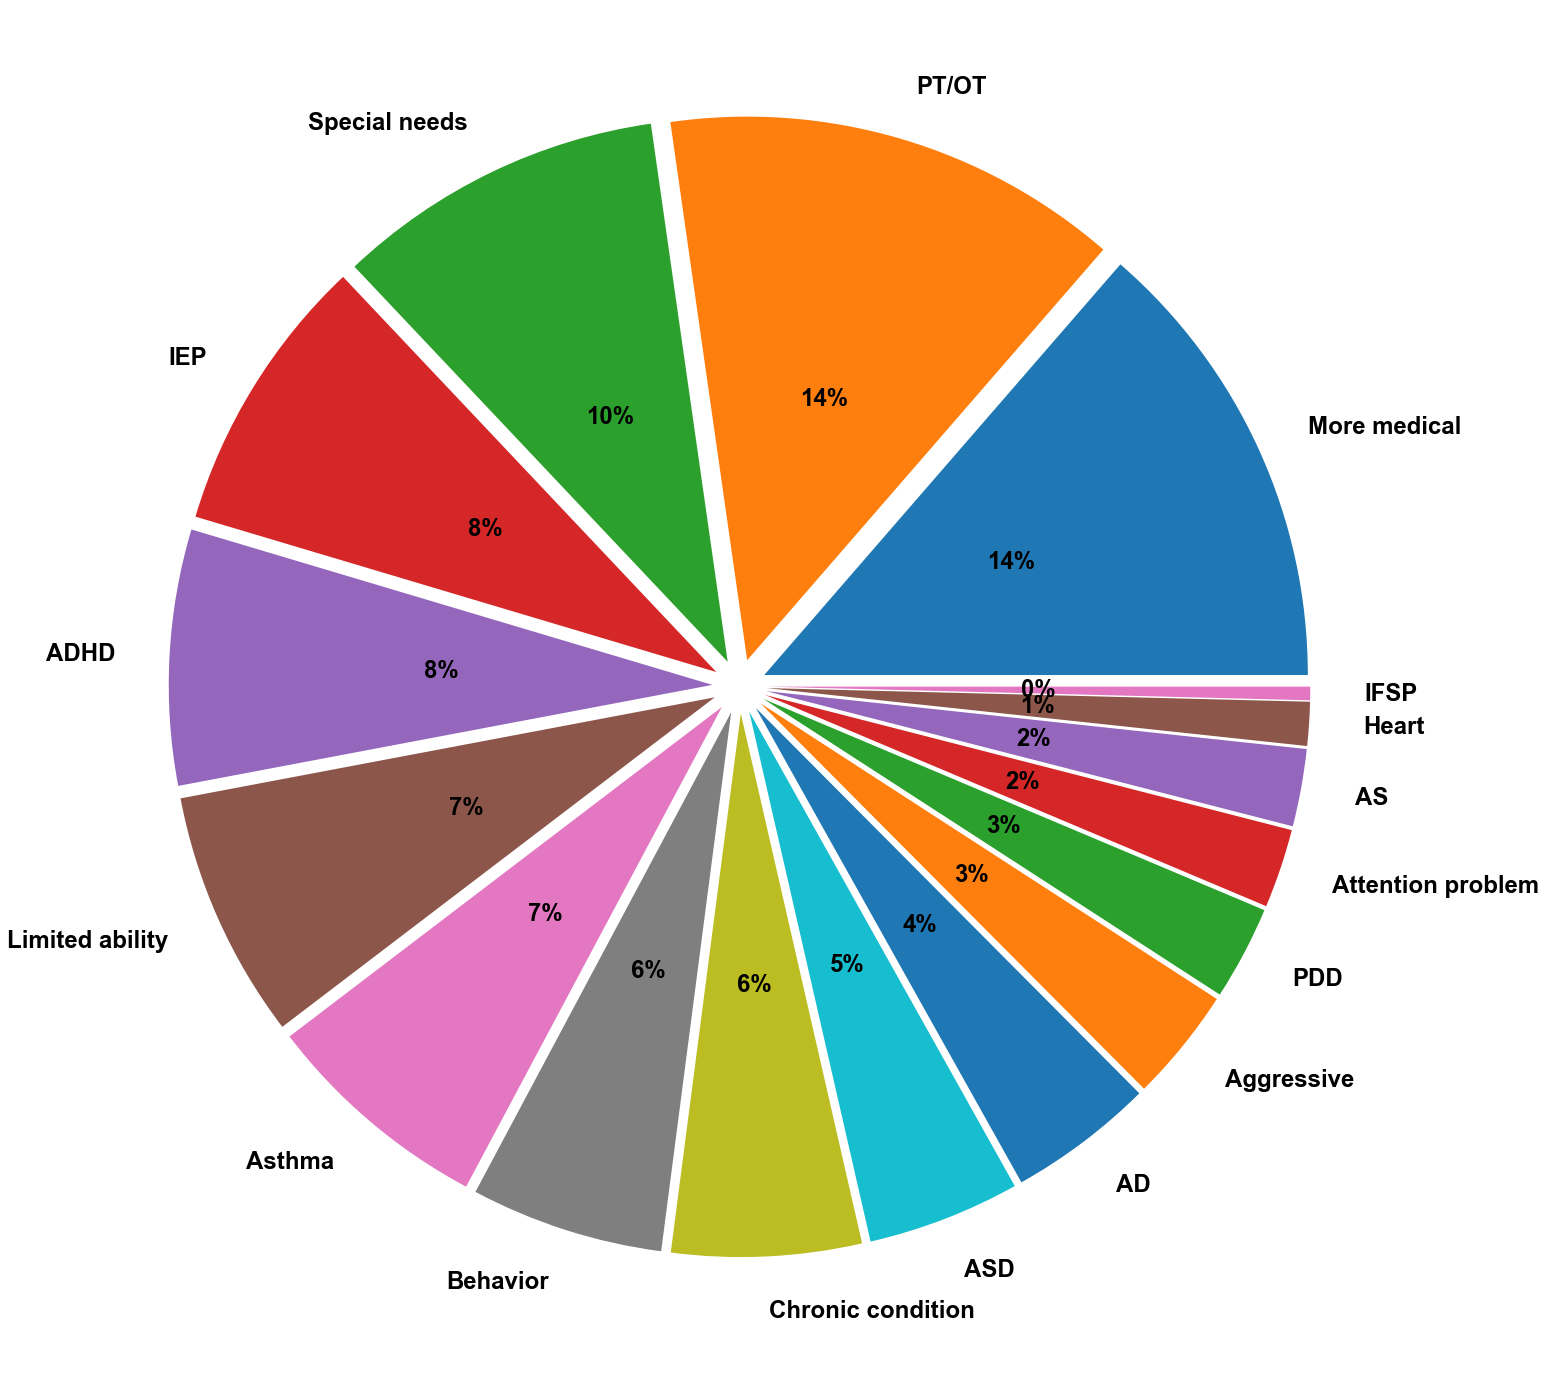

In [25]:
# Pie chart for more than one problem

types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * more_than_one_filtered.loc[more_than_one_filtered['type'] == t].shape[0]/(more_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("more_than_one.png")

In [26]:
# Data for one problem 

less_than_one_filtered = pd.DataFrame()
for ids, num in zip(list(less_than_one['unique_id']), list(less_than_one['Child#'])):
    temp = df_type_has_problem[df_type_has_problem['unique_id'] == ids]
    temp = temp[temp['Child#'] == num]
    less_than_one_filtered = less_than_one_filtered.append(temp)

['Asthma', 'PT/OT', 'ADHD', 'Attention problem', 'Chronic condition', 'Heart', 'More medical', 'Limited ability', 'Special needs', 'AD', 'Aggressive', 'Behavior', 'AS', 'PDD', 'ASD']
[41.67, 17.19, 9.9, 6.77, 5.73, 4.69, 4.17, 3.39, 1.82, 1.3, 1.04, 1.04, 0.78, 0.26, 0.26]
2003


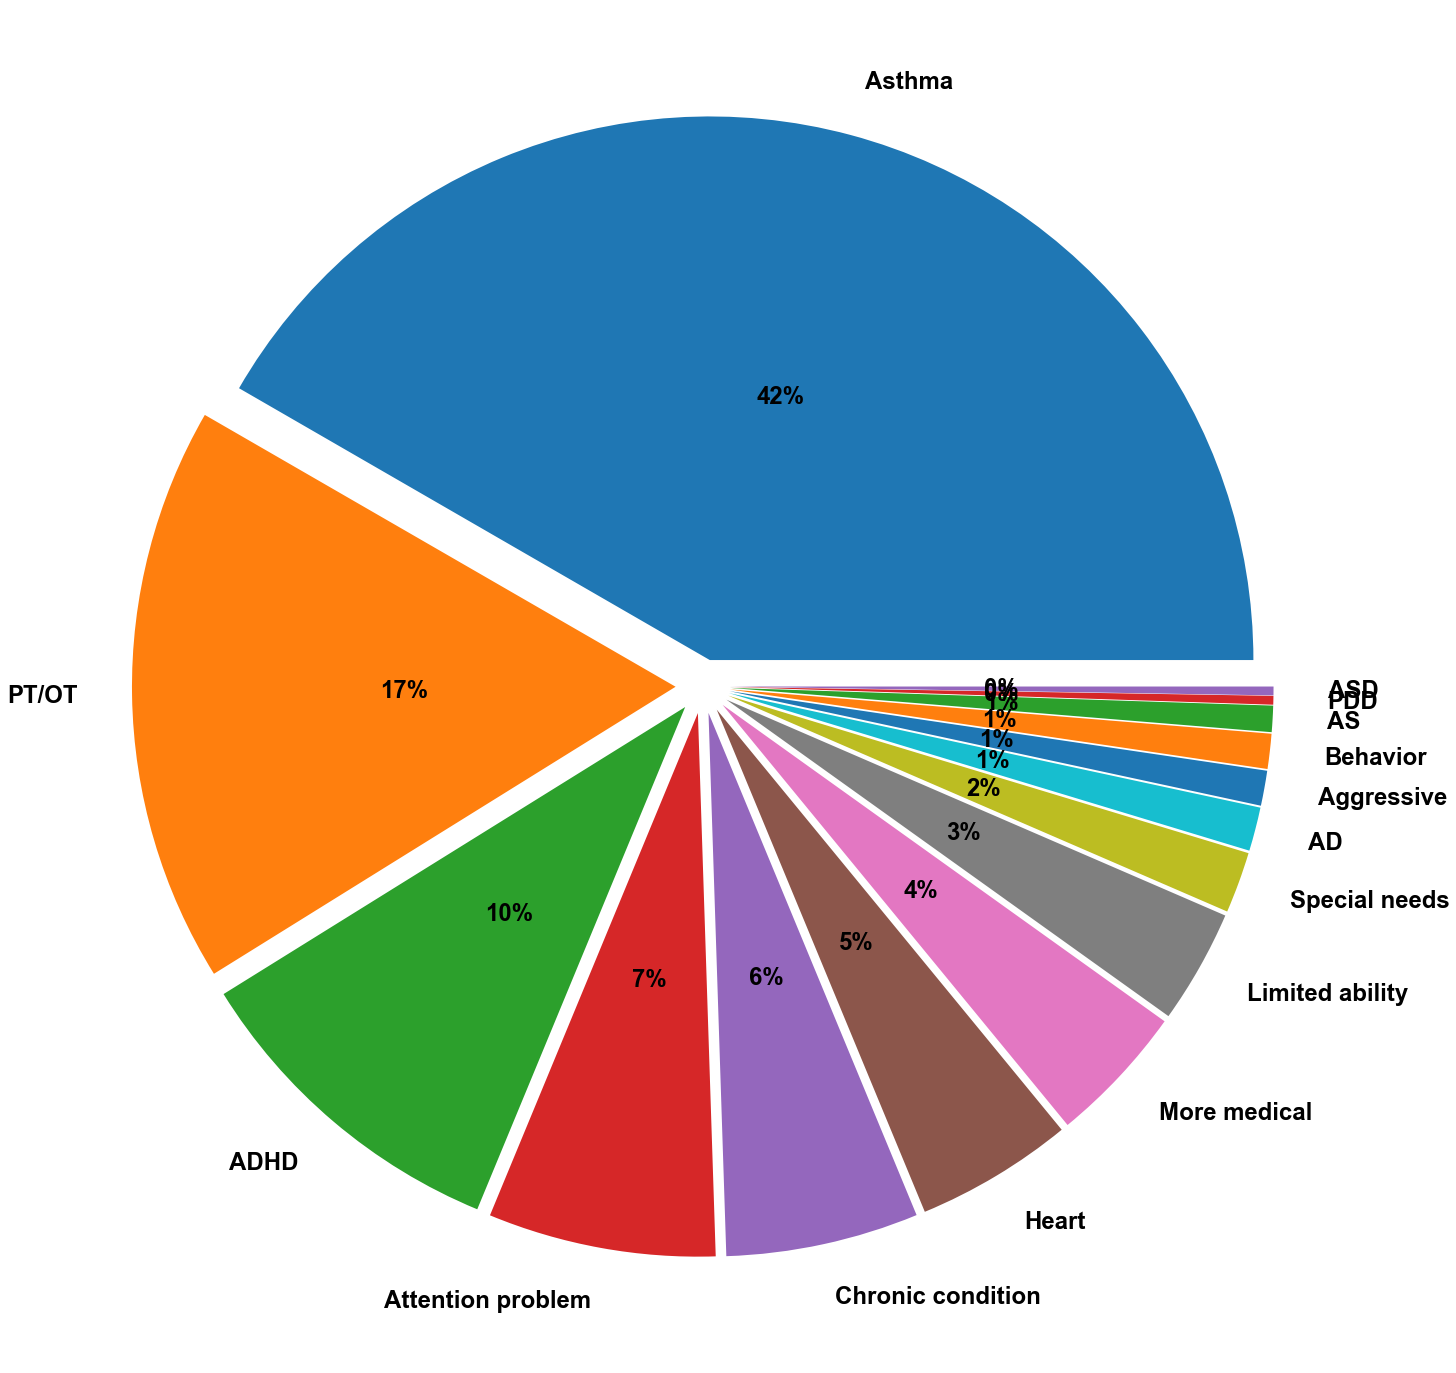

In [27]:
# Pie chart for one problem

types = ['PT/OT', 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart']

types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * less_than_one_filtered.loc[less_than_one_filtered['type'] == t].shape[0]/(less_than_one_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print((more_than_one_filtered.shape[0]))
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

# ax.set_title("Most Common Problem ")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("less_than_one.png")

In [28]:
more_than_one_filtered_unique = more_than_one_filtered.drop_duplicates(['unique_id','Child#'])

In [29]:
more_than_one_filtered_unique['sex'].value_counts()

male      296
female    147
Name: sex, dtype: int64

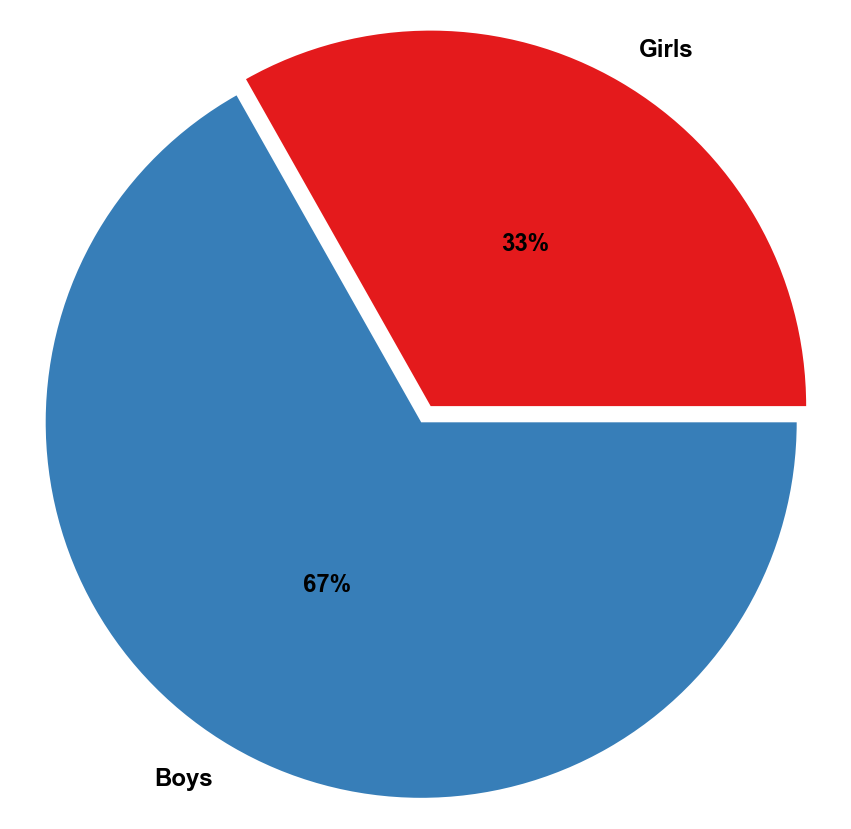

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.rcParams['font.size'] = 24
labels = ['Girls' ,'Boys']

percentages = [147/more_than_one_filtered_unique.shape[0], 296/more_than_one_filtered_unique.shape[0]]
explode=(0.05, 0)

theme = plt.get_cmap('Set1')
ax.set_prop_cycle("color", [theme(0.3 * i / len(percentages))
                             for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
ax.axis('equal');

# ax.set_title("Percentage of Chilhood Behavior Problems")
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_female_more_than_one_pie.png")

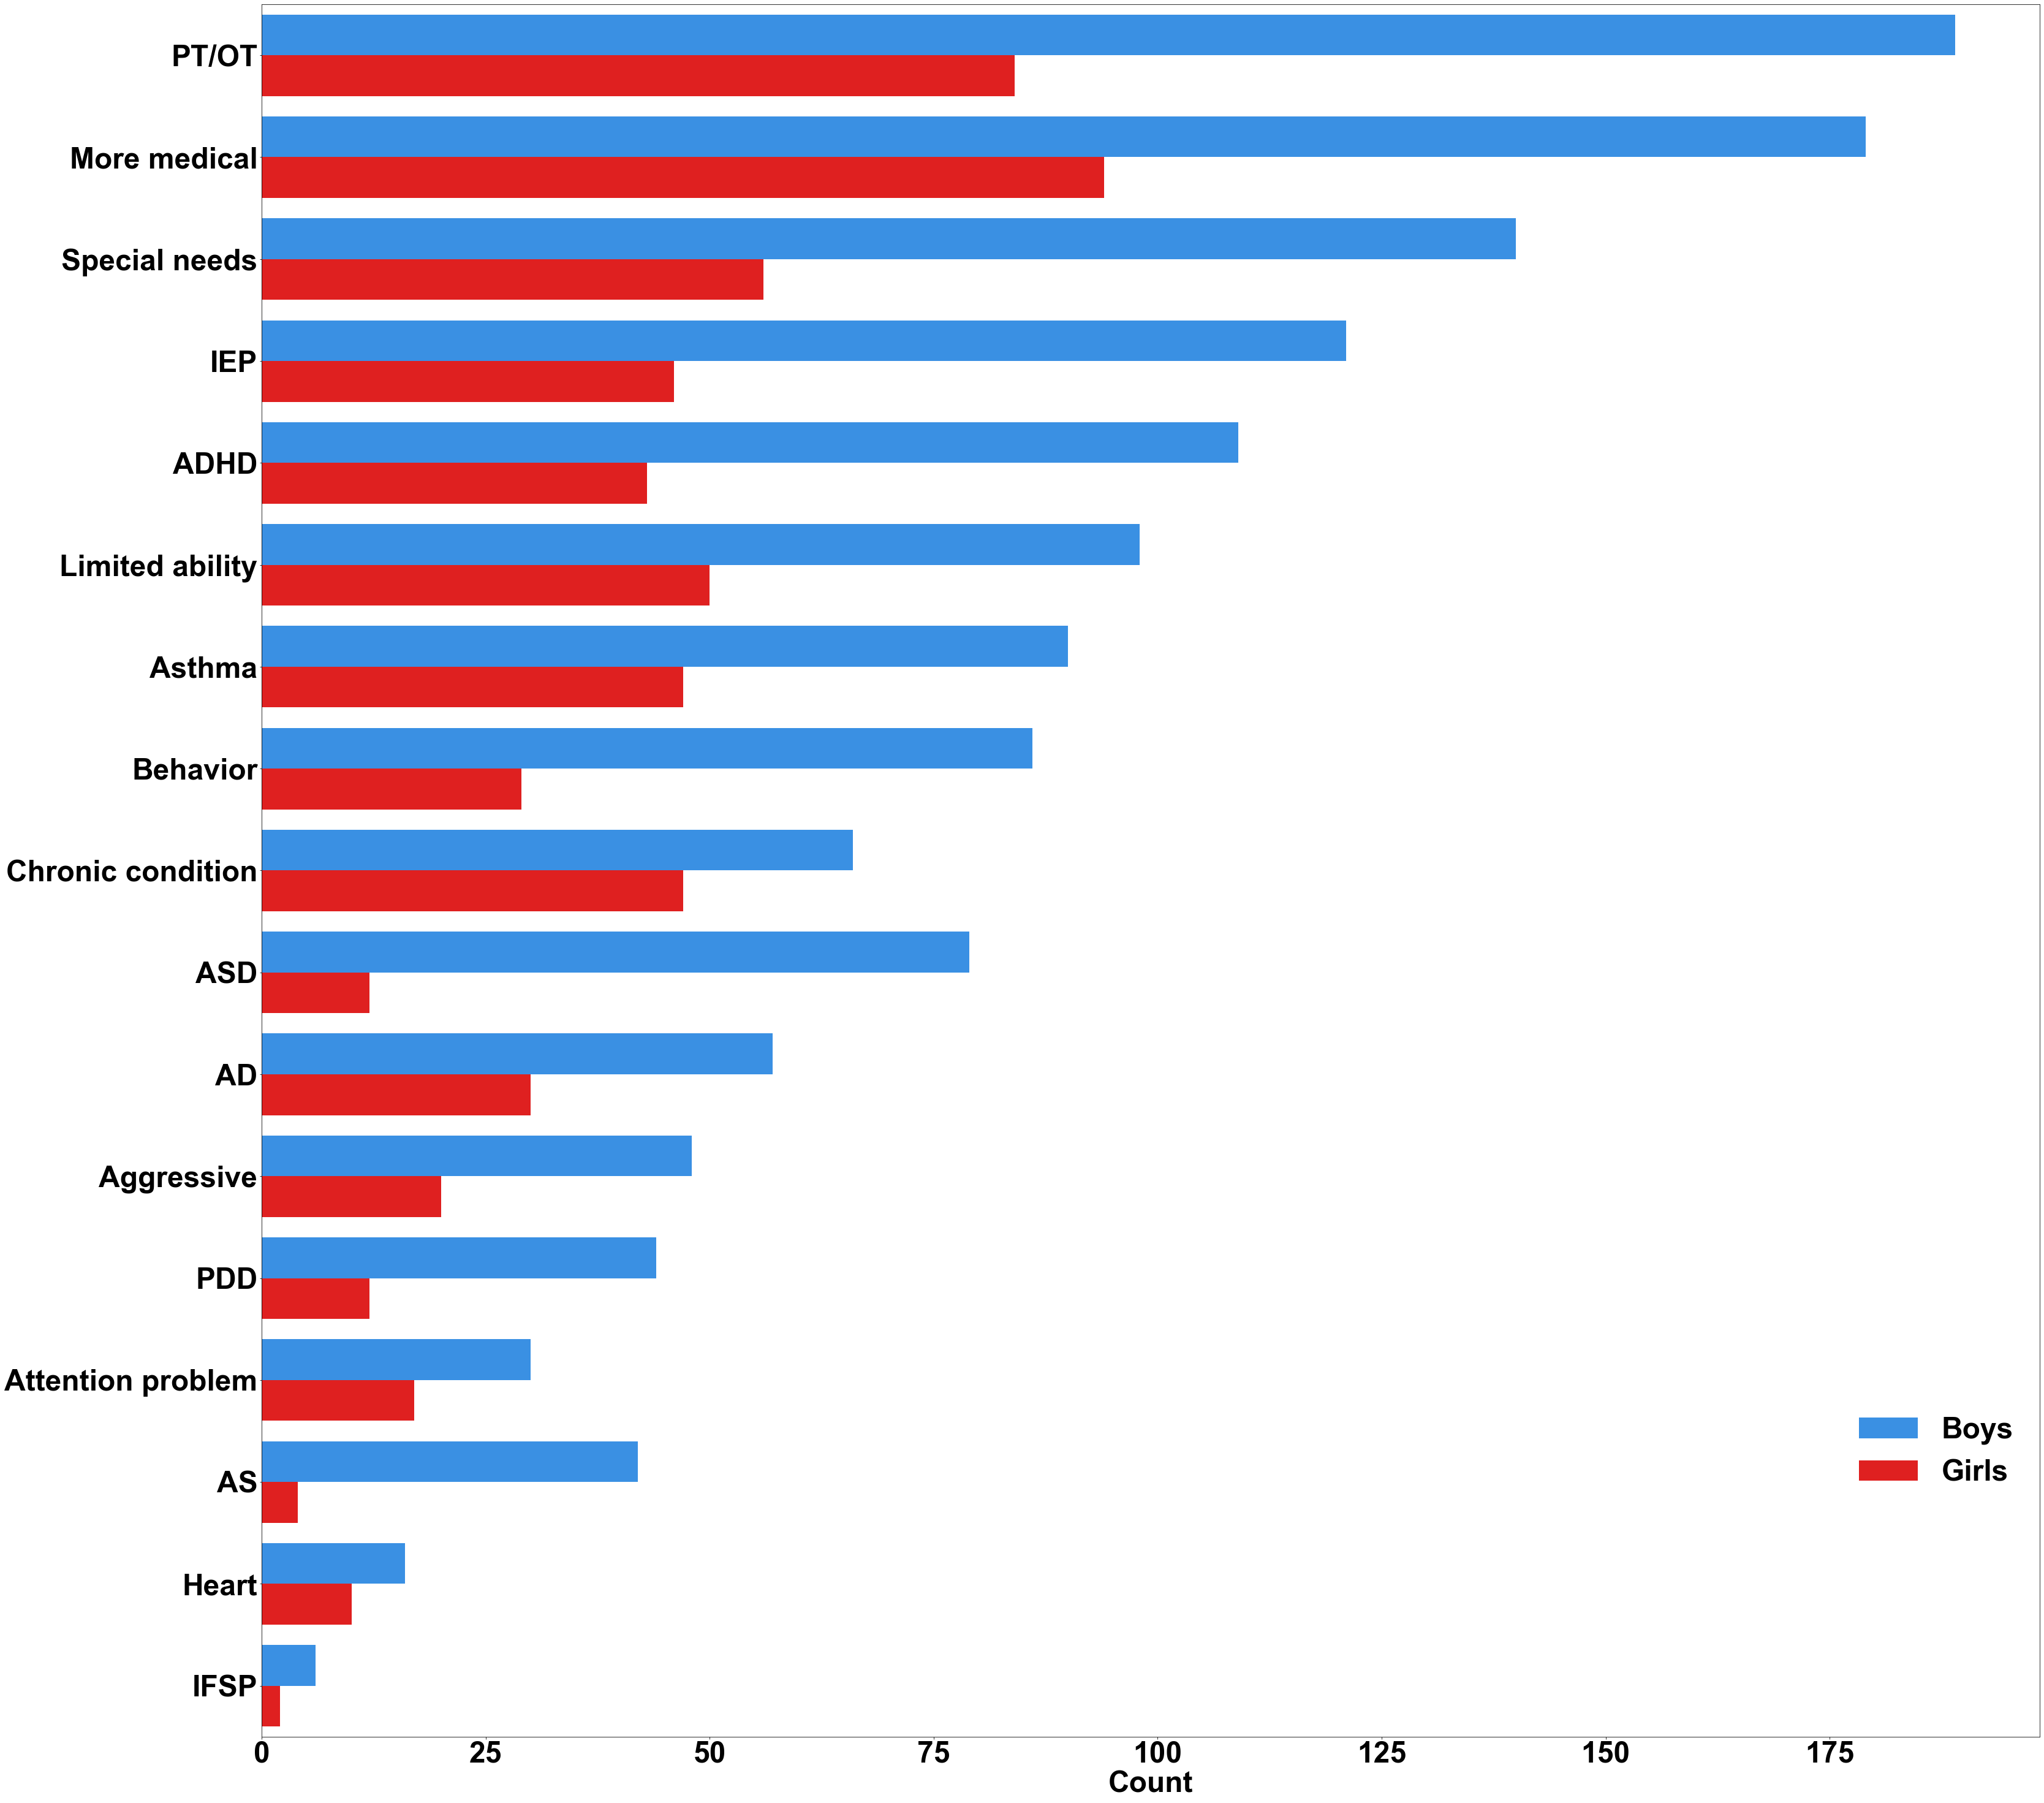

In [31]:
# Bar plot for gender per each problem type
labels = list(more_than_one_filtered['type'].value_counts().index)

color_palette_list = ['dodgerblue', 'red']
# color_palette_list = sb.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(52, 52))
b = sb.countplot(y = "type",hue = "sex", data=more_than_one_filtered, palette=color_palette_list, order = more_than_one_filtered['type'].value_counts().index);
b.set_xlabel("Count",fontsize=48,fontweight='bold')
b.set_ylabel("",fontsize=48,fontweight='bold')
b.set_yticklabels(labels)
b.tick_params(labelsize=48)
b.legend(['Boys', 'Girls'], frameon=False, bbox_to_anchor=(1, 0.2), fontsize = 48)
plt.savefig("male_female_type_more_than_one.png")

In [32]:
female_more_than_one_filtered = more_than_one_filtered.loc[more_than_one_filtered['sex'] == 'female']
male_more_than_one_filtered = more_than_one_filtered.loc[more_than_one_filtered['sex'] == 'male']


In [33]:
# get ids of those how has 3 top problems
male_PT_OT_type = male_more_than_one_filtered.loc[male_more_than_one_filtered['type'] == 'PT/OT']
male_other_type = male_more_than_one_filtered.loc[male_more_than_one_filtered['type'] != 'PT/OT']

In [34]:
# More than one problem data for PT/OT type 
male_PT_OT_type_filtered = pd.DataFrame()
for ids, age in zip(list(male_PT_OT_type['unique_id']), list(male_PT_OT_type['child_age'])):
    q = ('unique_id == {} and child_age == {}'.format(ids, age))
    temp = male_other_type.query(q)
    male_PT_OT_type_filtered = male_PT_OT_type_filtered.append(temp)
 

In [35]:
types = [ 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']

In [36]:
types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * male_PT_OT_type_filtered.loc[male_PT_OT_type_filtered['type'] == t].shape[0]/(male_PT_OT_type_filtered.shape[0]),4))
    
    print(t, round(100 * male_PT_OT_type_filtered.loc[male_PT_OT_type_filtered['type'] == t].shape[0]/(male_PT_OT_type_filtered.shape[0]),4))

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)
print(male_PT_OT_type_filtered.shape[0])

Asthma 4.5204
More medical 15.4355
Special needs 12.6792
ADHD 7.7178
IEP 11.5766
Limited ability 9.151
Chronic condition 3.6384
Behavior 7.1665
ASD 7.6075
AD 4.7409
Aggressive 3.9691
Attention problem 2.3153
PDD 4.5204
AS 3.4179
Heart 0.882
IFSP 0.6615
907


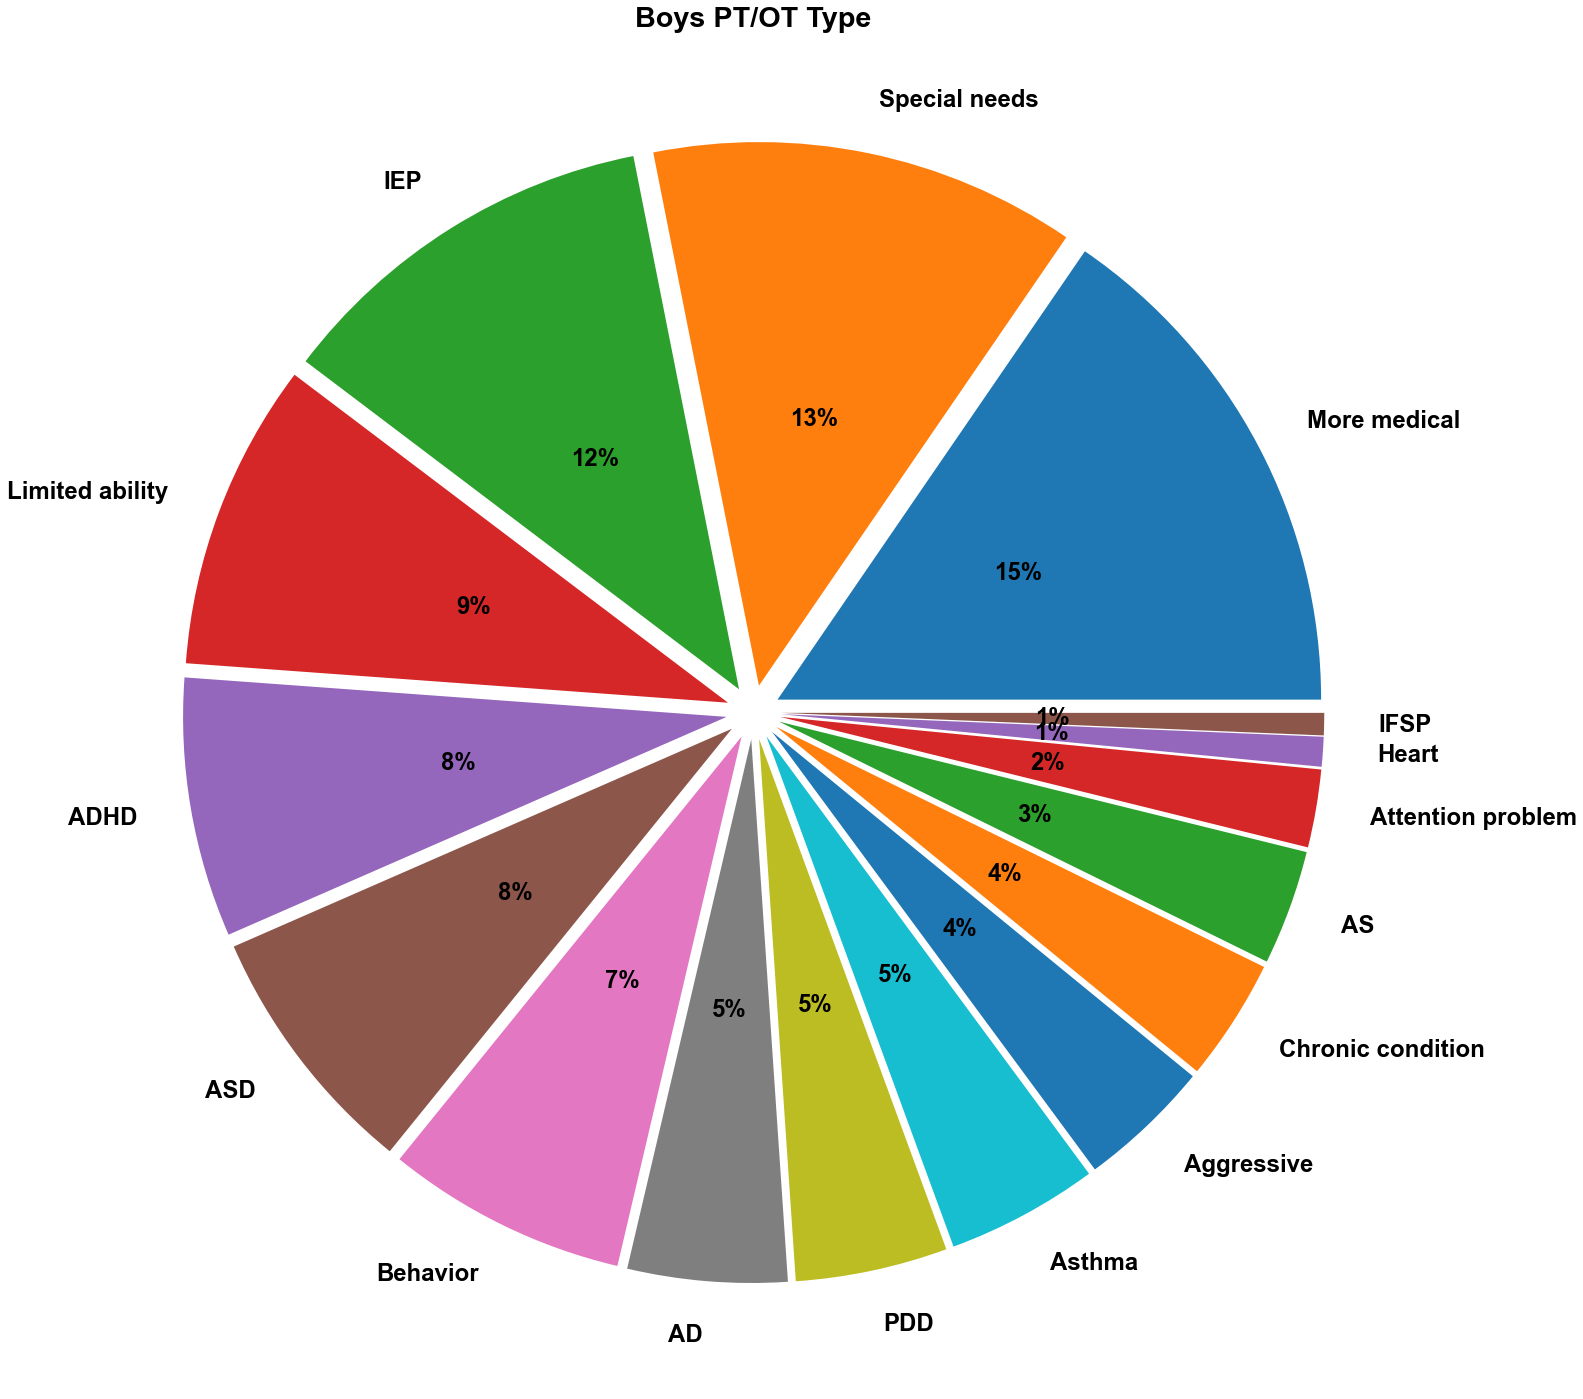

In [37]:
# Pie chart for PT/OT
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)


ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal')

ax.set_title("Boys PT/OT Type", fontweight='bold')
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_PT_OT_type.png")

In [38]:
# More than one problem data for More medical type  

male_More_medical_type = male_more_than_one_filtered.loc[male_more_than_one_filtered['type'] == 'More medical']
male_other_type = male_more_than_one_filtered.loc[male_more_than_one_filtered['type'] != 'More medical']
male_More_medical_type_filtered = pd.DataFrame() 

for ids, age in zip(list(male_More_medical_type['unique_id']), list(male_More_medical_type['child_age'])):
    temp = male_other_type[male_other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    male_More_medical_type_filtered = male_More_medical_type_filtered.append(temp)
    

['PT/OT', 'Special needs', 'IEP', 'Limited ability', 'ADHD', 'ASD', 'Behavior', 'Asthma', 'Chronic condition', 'AD', 'PDD', 'Aggressive', 'AS', 'Attention problem', 'Heart', 'IFSP']
[16.15, 12.8, 10.61, 9.11, 7.96, 7.15, 7.04, 4.84, 4.73, 4.5, 4.15, 3.92, 3.69, 1.85, 0.81, 0.69]
867


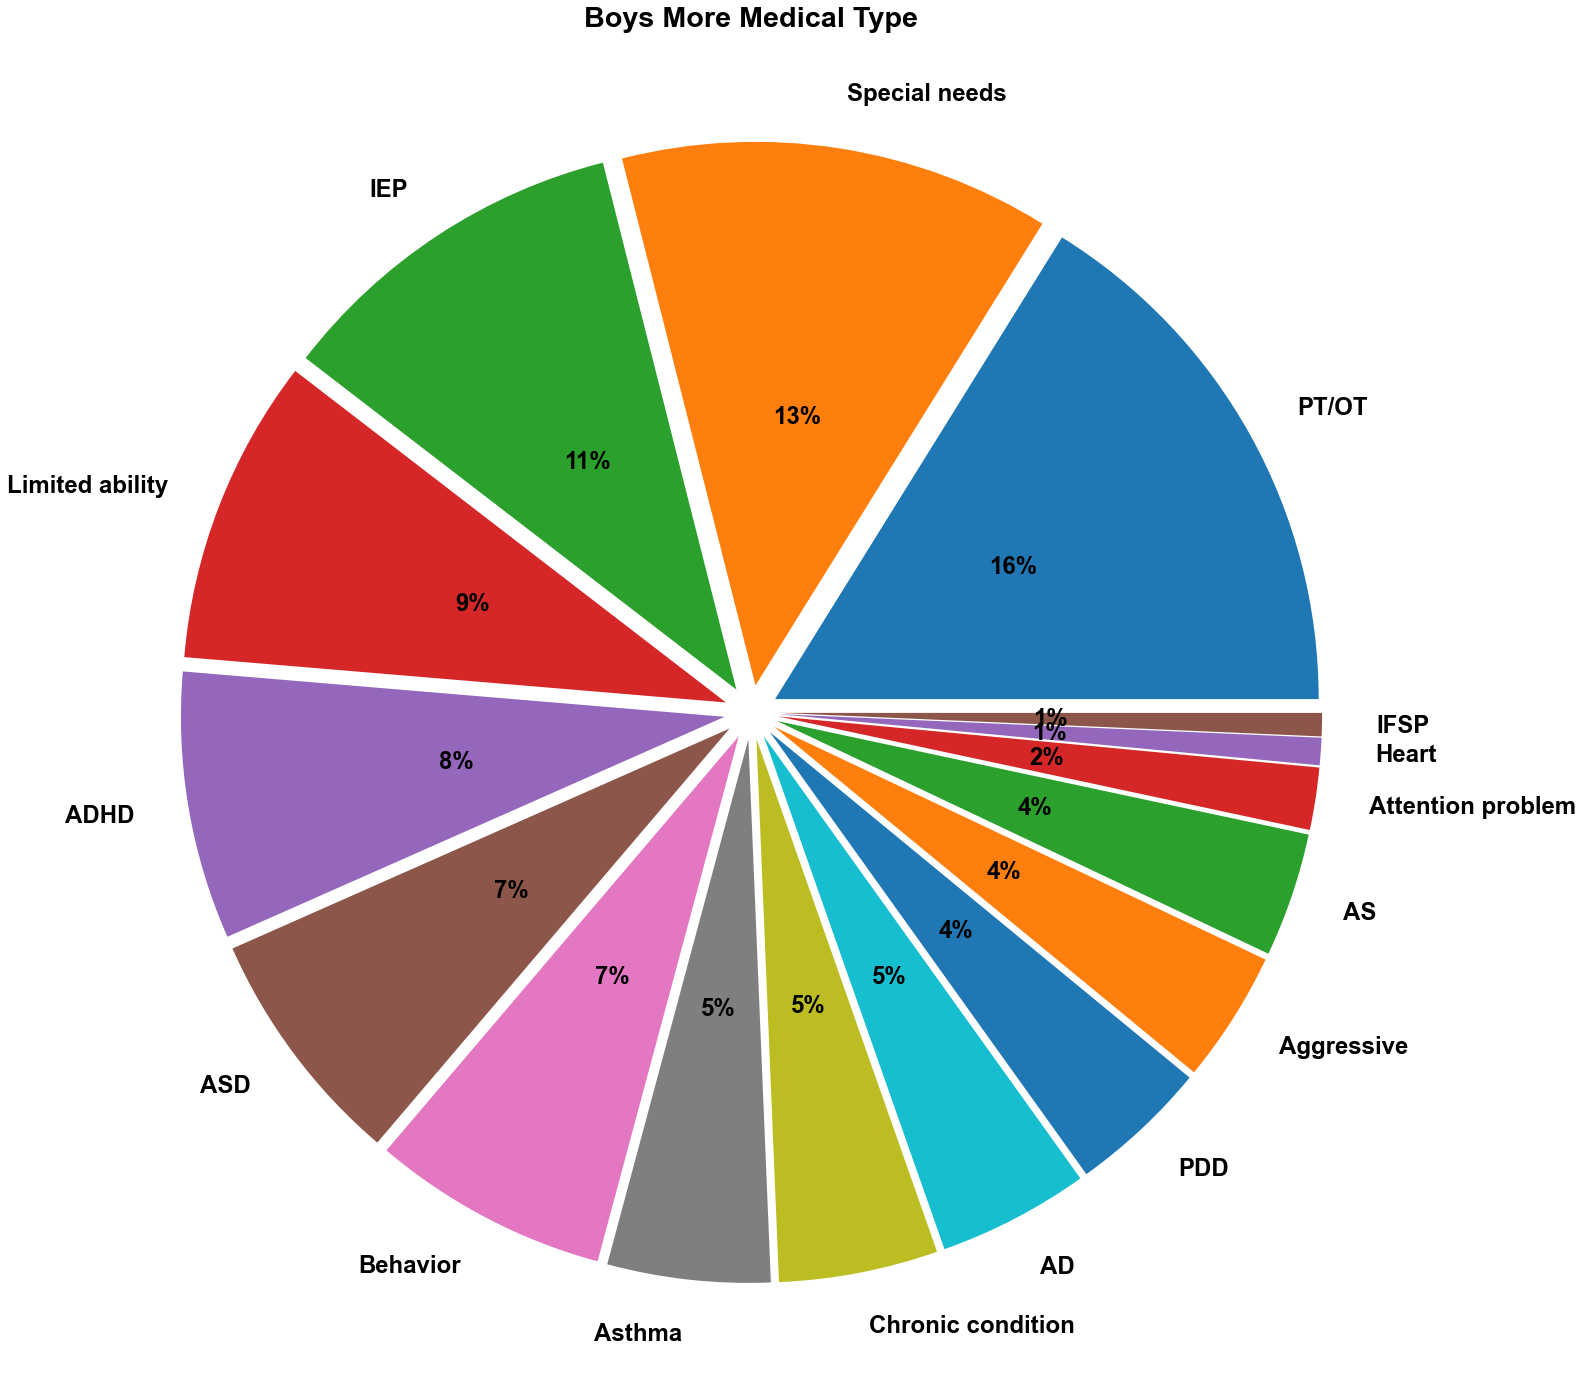

In [39]:
# Pie Chart

types = ['PT/OT', 
         'Asthma',
         
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * male_More_medical_type_filtered.loc[male_More_medical_type_filtered['type'] == t].shape[0]/(male_More_medical_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(male_More_medical_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Boys More Medical Type", fontweight='bold')
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("male_More_medical_type.png")

In [40]:
# More than one problem data for More medical type  

female_More_medical_type = female_more_than_one_filtered.loc[female_more_than_one_filtered['type'] == 'More medical']
female_other_type = female_more_than_one_filtered.loc[female_more_than_one_filtered['type'] != 'More medical']
female_More_medical_type_filtered = pd.DataFrame() 

for ids, age in zip(list(female_More_medical_type['unique_id']), list(female_More_medical_type['child_age'])):
    temp = female_other_type[female_other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    female_More_medical_type_filtered = female_More_medical_type_filtered.append(temp)
    

['PT/OT', 'Special needs', 'Limited ability', 'IEP', 'Chronic condition', 'ADHD', 'Asthma', 'AD', 'Behavior', 'Aggressive', 'Attention problem', 'PDD', 'ASD', 'Heart', 'AS', 'IFSP']
[16.94, 12.37, 10.22, 10.22, 9.68, 8.33, 6.45, 5.65, 5.11, 3.49, 3.23, 2.69, 2.69, 1.34, 1.08, 0.54]
372


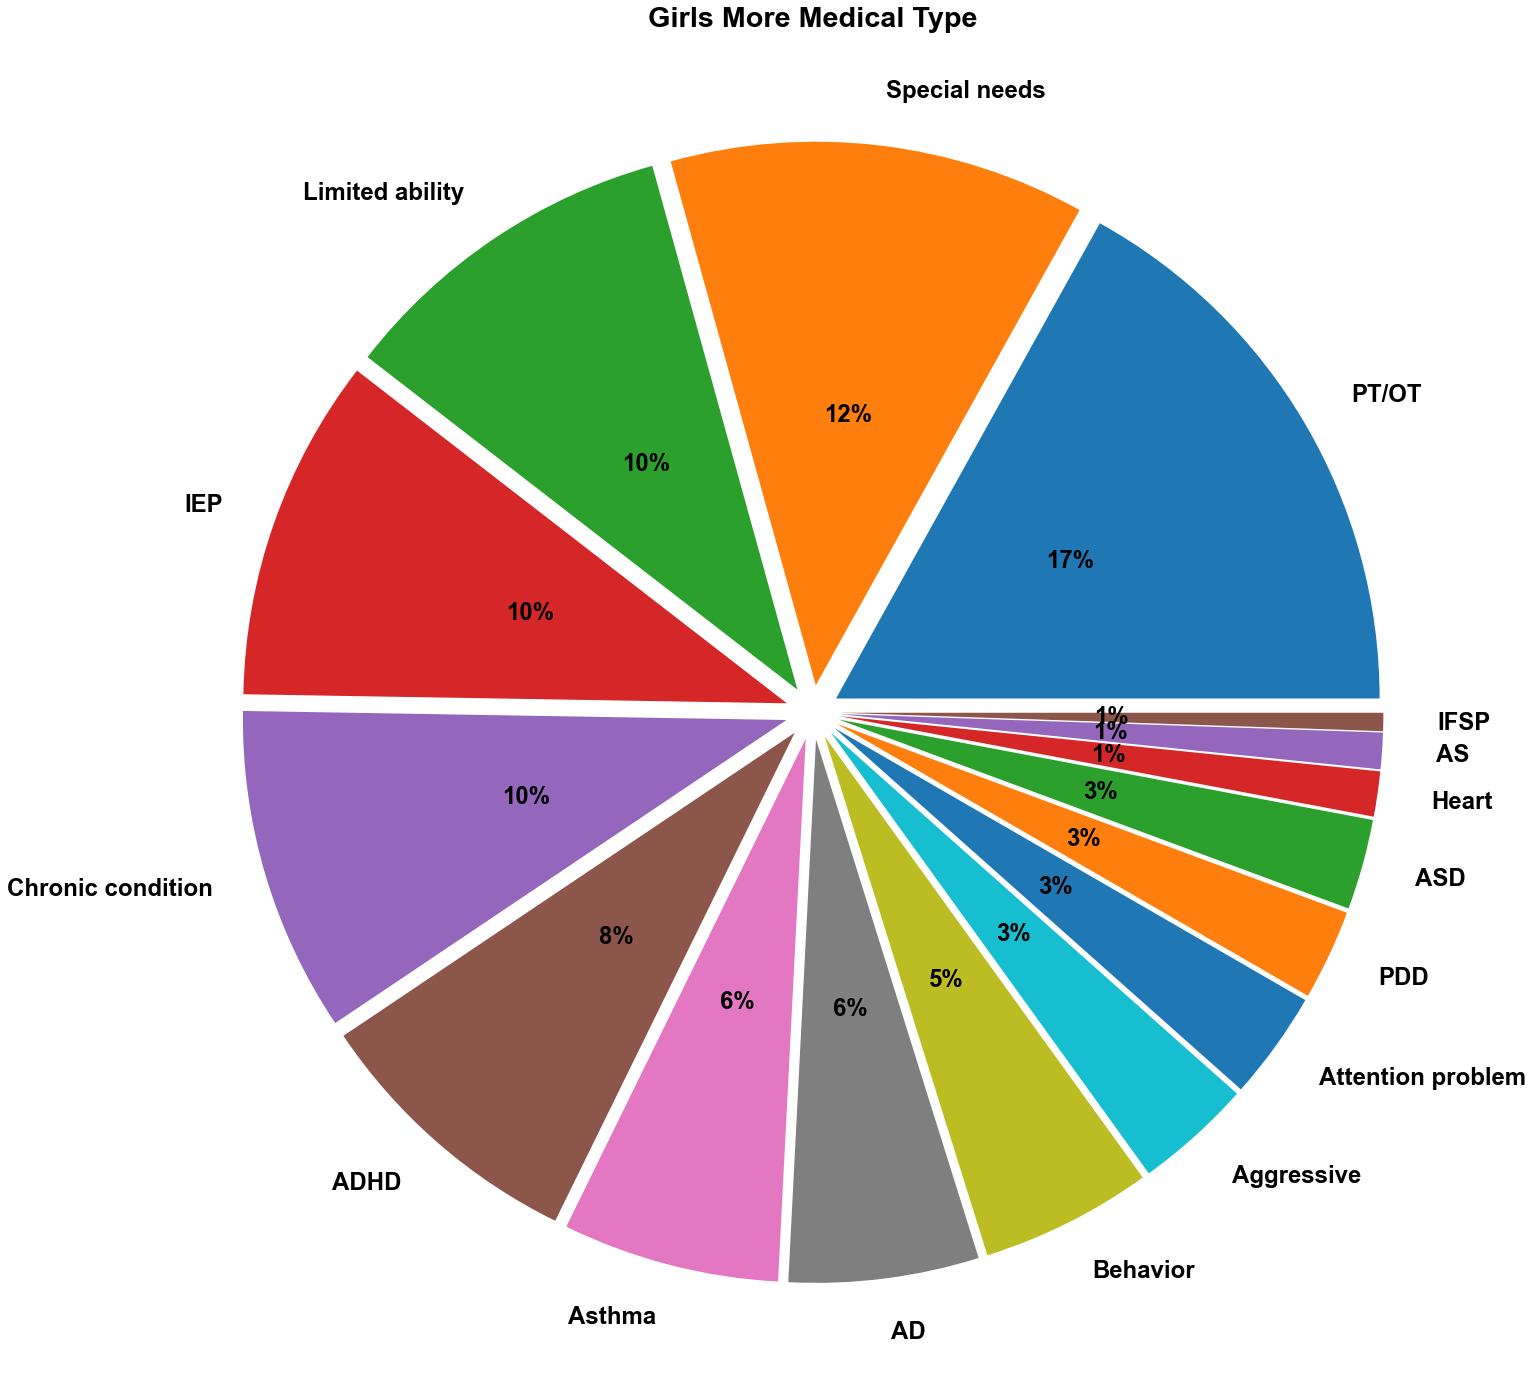

In [41]:
# Pie Chart

types = ['PT/OT', 
         'Asthma',
         
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * female_More_medical_type_filtered.loc[female_More_medical_type_filtered['type'] == t].shape[0]/(female_More_medical_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(female_More_medical_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Girls More Medical Type", fontweight='bold')
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("female_More_medical_type.png")

In [42]:
# More than one problem data for More medical type  

female_PT_OT_type = female_more_than_one_filtered.loc[female_more_than_one_filtered['type'] == 'PT/OT']
female_other_type = female_more_than_one_filtered.loc[female_more_than_one_filtered['type'] != 'PT/OT']
female_PT_OT_type_filtered = pd.DataFrame() 

for ids, age in zip(list(female_PT_OT_type['unique_id']), list(female_PT_OT_type['child_age'])):
    temp = female_other_type[female_other_type['unique_id'] == ids]
    temp = temp[temp['child_age'] == age]
    female_PT_OT_type_filtered = female_PT_OT_type_filtered.append(temp)
    

['More medical', 'Special needs', 'IEP', 'Limited ability', 'ADHD', 'Behavior', 'Chronic condition', 'AD', 'Aggressive', 'Asthma', 'PDD', 'ASD', 'Attention problem', 'AS', 'Heart', 'IFSP']
[18.0, 14.29, 12.0, 10.57, 7.71, 7.14, 6.86, 6.0, 4.0, 3.71, 2.86, 2.86, 2.29, 0.86, 0.57, 0.29]
350


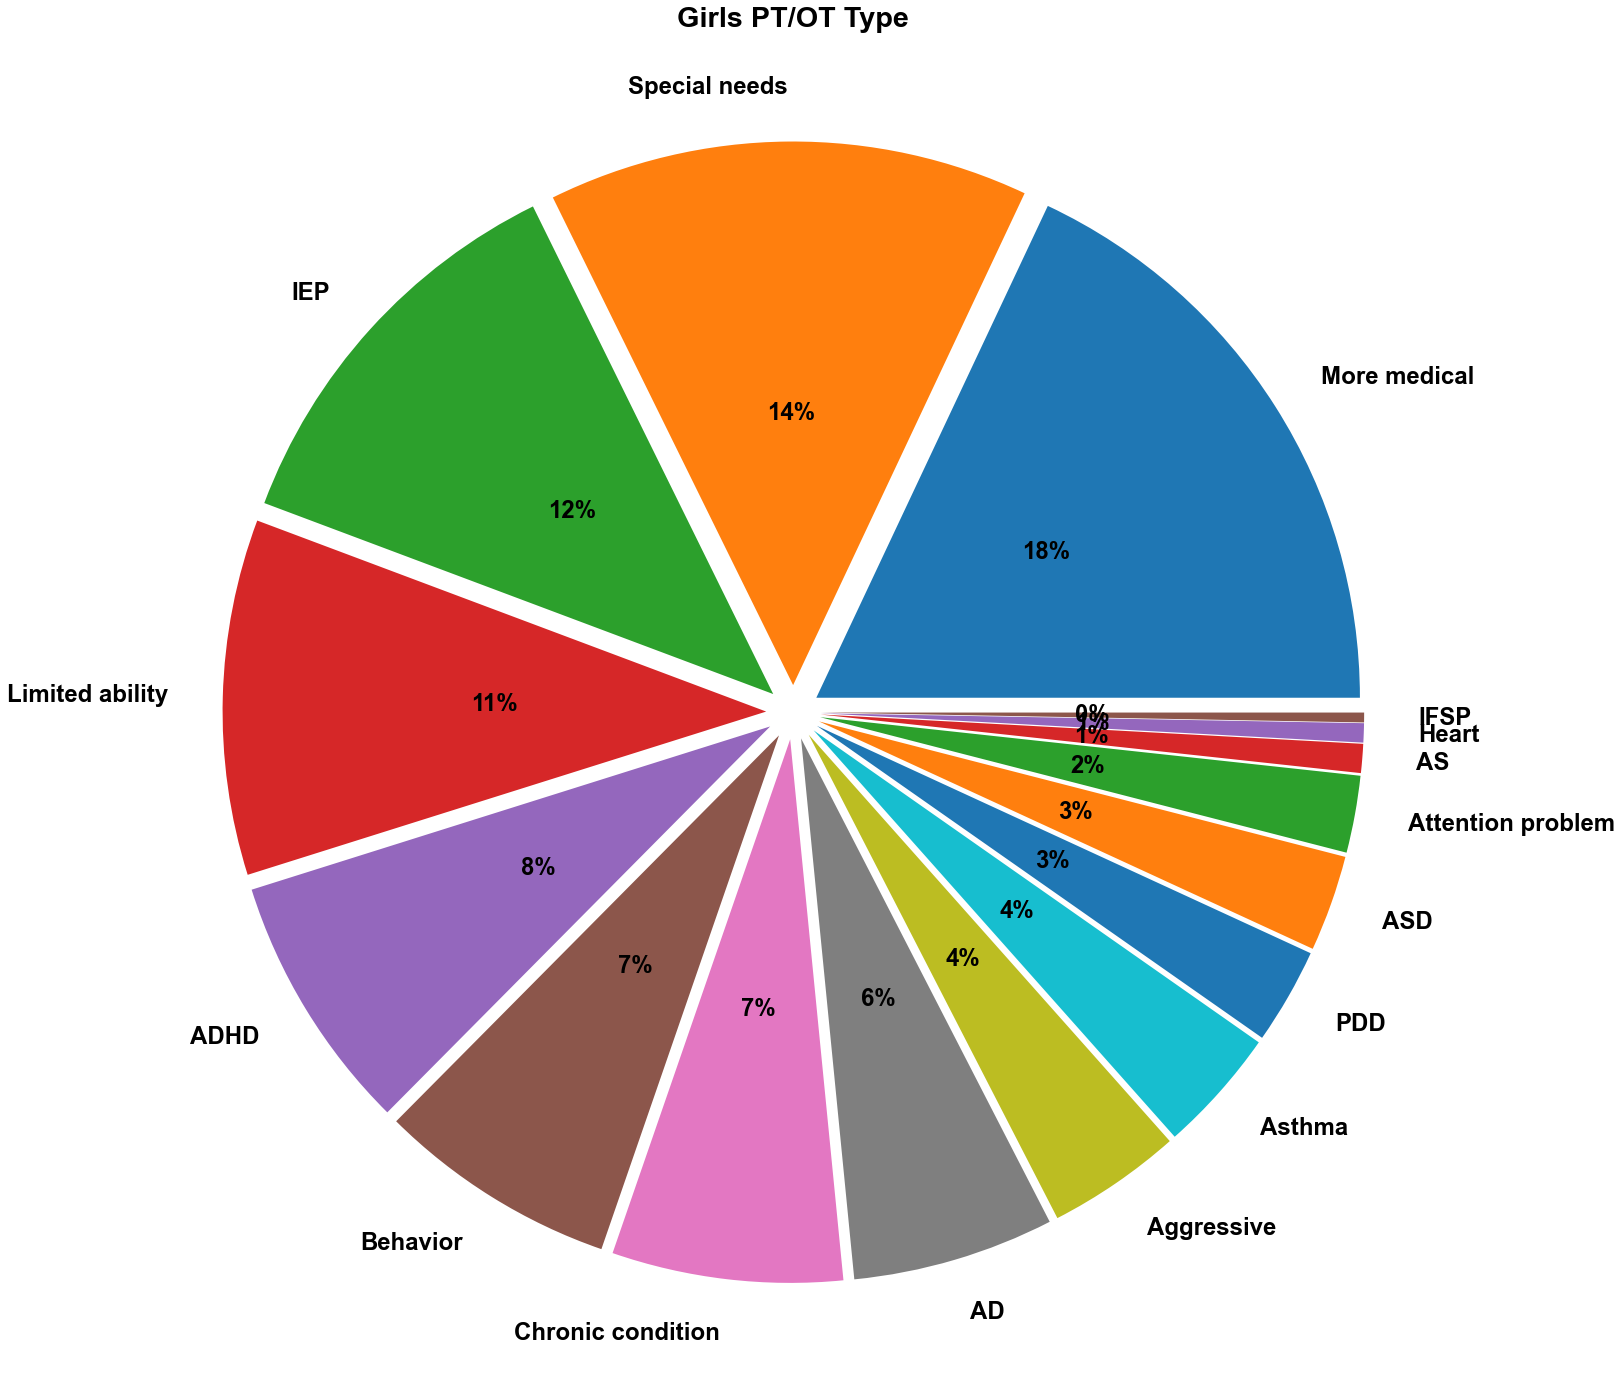

In [43]:
# Pie Chart

types = [ 
         'Asthma',
         'More medical',
         'Special needs',
         'ADHD',          
         'IEP',

         'Limited ability',
         'Chronic condition',
         'Behavior',
         'ASD',
         'AD',
         'Aggressive',          
         'Attention problem',

         'PDD',
         'AS',
         'Heart',
         'IFSP']


types_percentages = {}
for t in types:
    types_percentages[t] = (round(100 * female_PT_OT_type_filtered.loc[female_PT_OT_type_filtered['type'] == t].shape[0]/(female_PT_OT_type_filtered.shape[0]),2))
    

sorted_types_percentages = sorted(types_percentages.items(), key=lambda kv: kv[1])
sorted_types_percentages = collections.OrderedDict(sorted_types_percentages)

print(list(sorted_types_percentages.keys())[::-1])
print(list(sorted_types_percentages.values())[::-1])
print(female_PT_OT_type_filtered.shape[0])
fig, ax = plt.subplots(figsize=(25, 25))

plt.rcParams['font.size'] = 24
labels = list(sorted_types_percentages.keys())[::-1]

percentages = list(sorted_types_percentages.values())[::-1]
explode=[0.05] * len(labels)

# theme = plt.get_cmap('Set1')
# ax.set_prop_cycle("color", [theme(1.1 * i / len(percentages))
#                              for i in range(len(percentages))])
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
# ax.axis('equal');

ax.set_title("Girls PT/OT Type", fontweight='bold')
# ax.legend(frameon=False, bbox_to_anchor=(2.1, 1.3))
plt.savefig("female_PT_OT_type.png")